# Obtain detuning from FID

In [3]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/ben_ruobin_nmr_feb02/T2_CPMG_water")

In [4]:
def smooth(y, pts): #Rolling avg smoothing
    box = np.ones(pts)/pts
    yfilt=np.convolve(y,box,mode='same')
    return yfilt

In [5]:
FIDData = pd.read_csv(rel_path / "200.csv", header = None)
chan1 = FIDData[1].values
chan2 = FIDData[2].values
tlist = FIDData[0].values

chan1 = np.subtract(chan1, np.mean(chan1[2000:]))
chan2 = np.subtract(chan2, np.mean(chan2[2000:]))

chan1_smooth = smooth(chan1, 35)
chan2_smooth = smooth(chan2, 35)

trans_mag = np.sqrt(np.square(chan1_smooth) + np.square(chan2_smooth))

In [6]:
peaks, _ = sc.signal.find_peaks(
    np.square(trans_mag),
   # height = .2,
    distance = 250,
    #prominence = .5,
    width = 400
)

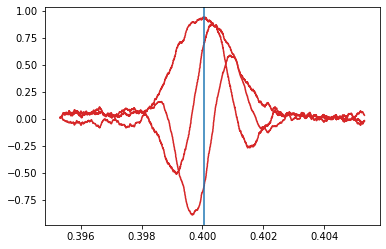

In [7]:
#plt.plot(tlist, chan1_smooth, color = "tab:red")
plt.plot(tlist, chan1_smooth, color = "tab:red")
plt.plot(tlist, chan2_smooth, color = "tab:red")
plt.plot(tlist, trans_mag, color = "tab:red")
plt.axvline(tlist[np.argmax(trans_mag)])
#plt.plot(tlist, chan2_smooth, color = "tab:blue")

In [8]:
data_dir = rel_path

In [9]:
def get_max(time):
    FIDData = pd.read_csv(data_dir / f"{time}.csv", header = None)
    chan1 = FIDData[1].values
    chan2 = FIDData[2].values
    tlist = FIDData[0].values

    chan1 = np.subtract(chan1, np.mean(chan1[2000:]))
    chan2 = np.subtract(chan2, np.mean(chan2[2000:]))
    
    chan1_smooth = smooth(chan1, 35)
    chan2_smooth = smooth(chan2, 35)
    
    trans_mag = np.sqrt(np.square(chan1_smooth) + np.square(chan2_smooth))

    return np.max(trans_mag)

In [37]:
data = list(sorted([(int(f.stem)*8*10e-4, get_max(int(f.stem))) for f in data_dir.iterdir()]))

In [38]:

times, heights = zip(*sorted(data))

In [39]:
def gaussian(t, A, sigma, mu):
    return A * np.exp(-(t-mu)**2/(2*sigma**2))

def cos(t, A, omega, c):
    return A * np.cos(omega*(t-c))

def exp(t, A, b):
    return A*np.exp(-t*b)

Text(0, 0.5, 'echo amplitdue (V)')

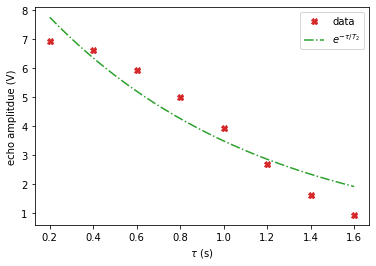

In [40]:
popt, pcov = curve_fit(exp, times, heights, p0=[7, .007])

plt.plot(times, heights, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times), max(times), 100)
plt.plot(xlist, [exp(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = r"$e^{-\tau/T_2}$")
plt.legend()
plt.xlabel(r"$\tau$ (s)")
plt.ylabel("echo amplitdue (V)")

In [36]:
1/popt[1]

0.4467017607008648